[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [ ]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [3]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

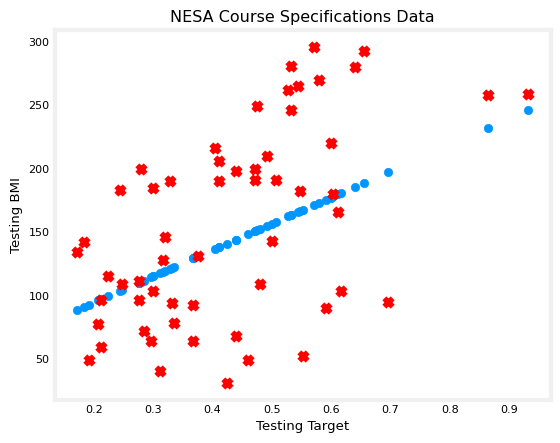

In [4]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.2566918320917717


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [6]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : abs(model_A.predict(x_test).round(2) - y_test)**2
})
print(table)
cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()

print(f"The cost or average loss of this model is {cost}")

      DoB    DoT  Predicted result        Loss
0   0.300  185.0        114.972023   4904.2009
1   0.332   94.0        121.601820    761.7600
2   0.544  265.0        165.524226   9896.2704
3   0.932  259.0        245.910515    171.3481
4   0.172  134.0         88.452835   2074.8025
5   0.492  210.0        154.750806   3052.5625
6   0.656  293.0        188.728516  10872.2329
7   0.864  258.0        231.822197    685.3924
8   0.472  191.0        150.607182   1631.3521
9   0.640  280.0        185.413617   8947.2681
10  0.224  115.0         99.226255    248.6929
11  0.296   64.0        114.143299   2514.0196
12  0.508  191.0        158.065704   1084.3849
13  0.532  246.0        163.038052   6882.3616
14  0.192   49.0         92.596458   1900.9600
15  0.440  198.0        143.977385   2918.1604
16  0.276   96.0        109.999675    196.0000
17  0.368   92.0        129.060342   1373.4436
18  0.476  249.0        151.435907   9517.9536
19  0.612  166.0        179.612545    185.2321
20  0.412  20

You may want to do some manual predictions to understand your model.

In [7]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[73.53579139]
[259.99883429]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [8]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 52.81767550827158
Coefficient: [207.18115878]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [9]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [10]:
mx_col = ['BMI','BP','FDR']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

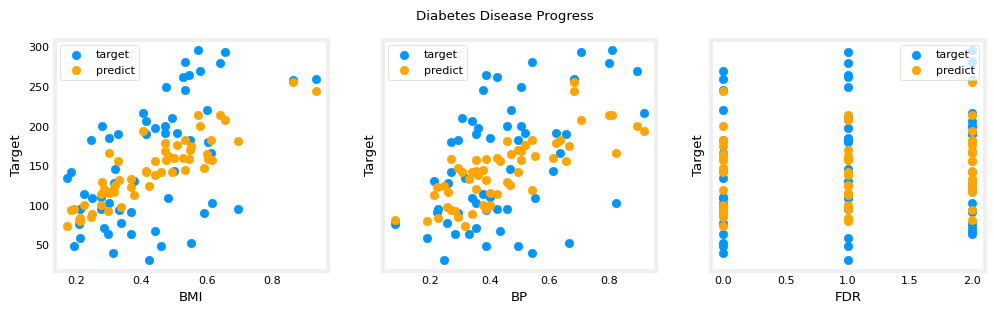

In [11]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [12]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.37568704708644884


In [13]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[42.13384341]
[251.69951198]


In [14]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Loss'] = abs(model_C.predict(mx_test).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 1780.5264096491226
      BMI        BP  FDR  Target  Predicted result        Loss
0   0.300  0.400000  1.0   185.0        116.040001   4755.4816
1   0.332  0.388235  2.0    94.0        132.249248   1463.0625
2   0.544  0.388235  1.0   265.0        159.067910  11221.1649
3   0.932  0.682353  0.0   259.0        244.567336    208.2249
4   0.172  0.317647  0.0   134.0         73.880803   3614.4144
5   0.492  0.305882  1.0   210.0        142.145659   4603.6225
6   0.656  0.705882  1.0   293.0        208.330281   7169.0089
7   0.864  0.682353  2.0   258.0        255.276529      7.3984
8   0.472  0.623529  2.0   191.0        179.049261    142.8025
9   0.640  0.800000  1.0   280.0        214.036384   4350.7216
10  0.224  0.376471  1.0   115.0        100.153584    220.5225
11  0.296  0.282353  0.0    64.0         93.069354    845.0649
12  0.508  0.517647  2.0   191.0        175.883371    228.6144
13  0.532  0.376471  0.0   246.0        144.324115  10338

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

#### Step 10. Polynomial Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
model_filename = 'my_saved_model_v3.sav'
poly_filename = 'my_saved_poly_v3.pkl'

model_D = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

In [ ]:
mx_col = ['BMI']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

In [ ]:
poly_features = poly.fit_transform(mx_test)

In [ ]:
y_pred = model_D.predict(poly_features)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

In [ ]:
test_score = model_D.score(poly_features, my_test)
print(f'Training data score: {test_score}')

In [ ]:
new_poly_feature = poly.fit_transform([[0.1]])
print(model_D.predict(new_poly_feature))

In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_D.predict(poly_features)
data['Loss'] = abs(model_D.predict(poly_features).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

#### Step 11

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.